In [15]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset
data = pd.read_csv('stock_data.csv', parse_dates=['Date'])

In [16]:
# Check for missing values
print(data.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Company      0
Ticker       0
dtype: int64


In [17]:
# Example: Adding a feature for the price range (high - low)
data['Price_Range'] = data['High'] - data['Low']

# Adding moving averages
data['MA_10'] = data['Close'].rolling(window=10).mean()
data['MA_50'] = data['Close'].rolling(window=50).mean()

In [18]:
# One-hot encoding the Ticker column
data = pd.get_dummies(data, columns=['Ticker'], drop_first=True)

In [19]:
data.dropna(inplace=True)

In [20]:
# Check for missing values in the entire dataset
print(data.isnull().sum())

Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Company         0
Price_Range     0
MA_10           0
MA_50           0
Ticker_AMZN     0
Ticker_GOOGL    0
Ticker_JNJ      0
Ticker_JPM      0
Ticker_MSFT     0
Ticker_TSLA     0
Ticker_XOM      0
dtype: int64


In [21]:
# Defining the feature set X and the target variable y
X = data[['Open', 'High', 'Low', 'Volume', 'Price_Range', 'MA_10', 'MA_50']]
y = data['Close']

In [22]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
print(f"Linear Regression MSE: {mean_squared_error(y_test, y_pred_lr)}")
print(f"Linear Regression R^2: {r2_score(y_test, y_pred_lr)}")

Linear Regression MSE: 1.8529666397367472
Linear Regression R^2: 0.9996697066752406


In [24]:
from sklearn.svm import SVR

# Initialize the model
svm_model = SVR(kernel='rbf')

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print(f"SVM MSE: {mean_squared_error(y_test, y_pred_svm)}")
print(f"SVM R^2: {r2_score(y_test, y_pred_svm)}")


SVM MSE: 5678.8187200052525
SVM R^2: -0.012255631328034644


In [25]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the model
dt_model = DecisionTreeRegressor()

# Train the model
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print(f"Decision Tree MSE: {mean_squared_error(y_test, y_pred_dt)}")
print(f"Decision Tree R^2: {r2_score(y_test, y_pred_dt)}")


Decision Tree MSE: 6.374360527209991
Decision Tree R^2: 0.9988637632828369


In [26]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print(f"Random Forest MSE: {mean_squared_error(y_test, y_pred_rf)}")
print(f"Random Forest R^2: {r2_score(y_test, y_pred_rf)}")


Random Forest MSE: 3.1433702798452856
Random Forest R^2: 0.9994396908188118


In [27]:
# Example new data
X_new = [
    [74.28, 75.14, 74.12, 146322800, 1.019997, 74.95, 74.30], 
]

# Predictions for new data
pred_lr = lr_model.predict(X_new)
pred_svm = svm_model.predict(X_new)
pred_dt = dt_model.predict(X_new)
pred_rf = rf_model.predict(X_new)

print("New Data Predictions:")
print("Linear Regression:", pred_lr)
print("SVM:", pred_svm)
print("Decision Tree:", pred_dt)
print("Random Forest:", pred_rf)


New Data Predictions:
Linear Regression: [74.89028255]
SVM: [149.57135391]
Decision Tree: [75.41049957]
Random Forest: [74.76361389]


C:\Users\blah9\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\blah9\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
C:\Users\blah9\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\blah9\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


C:\Users\blah9\AppData\Local\Temp\ipykernel_4640\2117608367.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


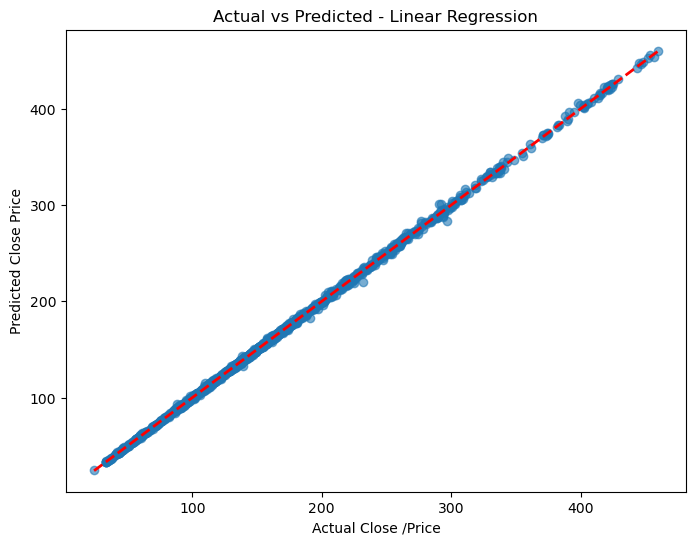

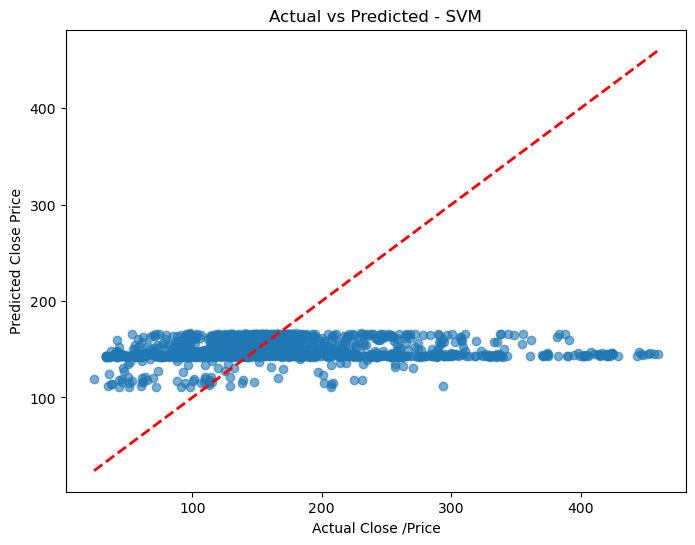

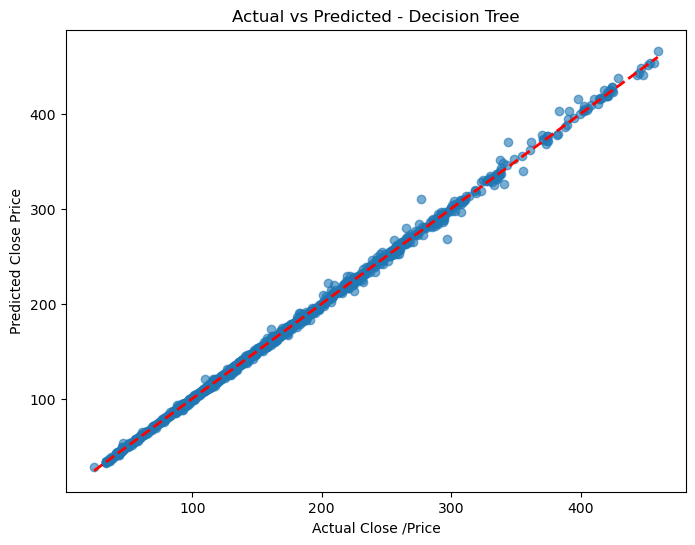

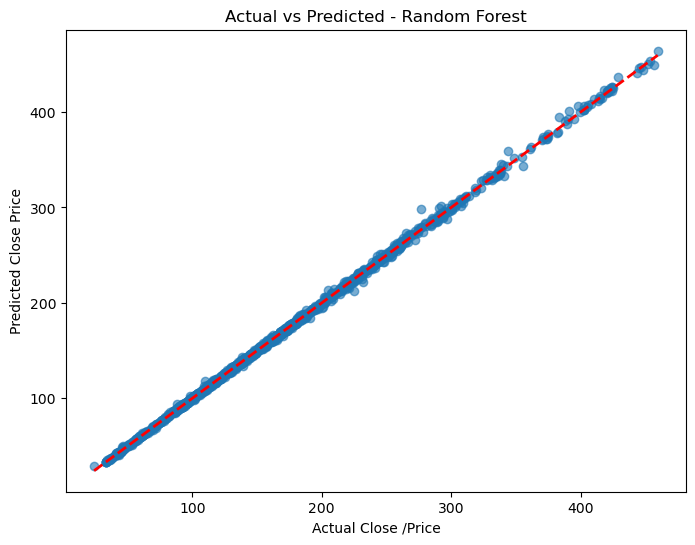

In [31]:
import matplotlib.pyplot as plt

models = {
    'Linear Regression': y_pred_lr,
    'SVM': y_pred_svm,
    'Decision Tree': y_pred_dt,
    'Random Forest': y_pred_rf
}

for model_name, predictions in models.items():
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, predictions, alpha=0.6)
    plt.title(f"Actual vs Predicted - {model_name}")
    plt.xlabel("Actual Close /Price")
    plt.ylabel("Predicted Close Price")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
    plt.show()

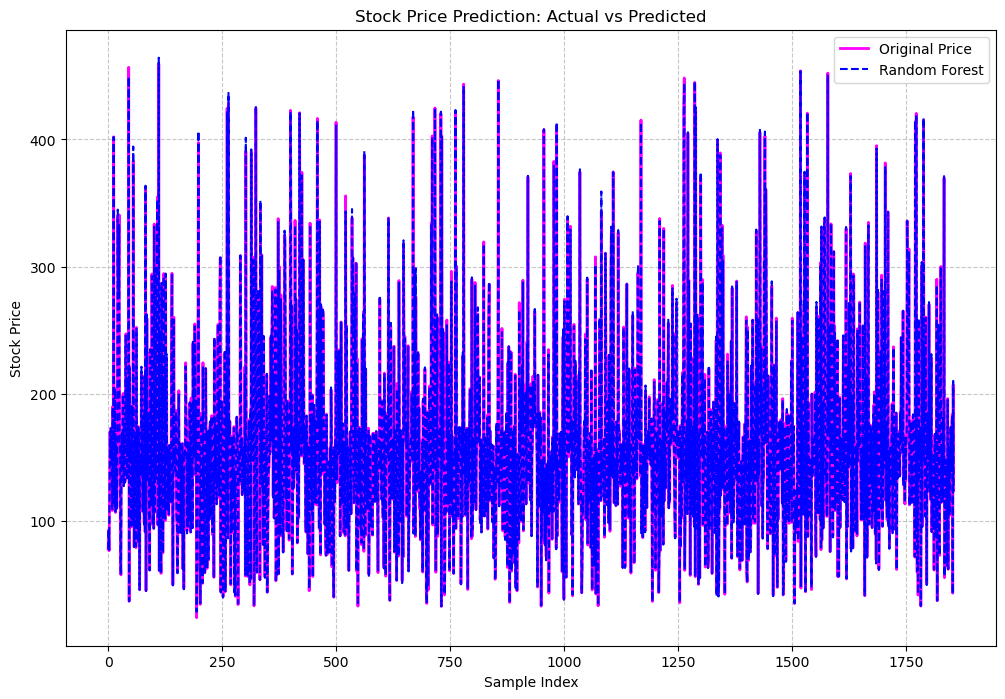

In [35]:
# Overlay actual vs. predicted prices for all models on a single graph

plt.figure(figsize=(12, 8))
plt.plot(range(len(y_test)), y_test.values, label="Original Price", color='magenta', linewidth=2)
# plt.plot(range(len(models['Linear Regression'])), models['Linear Regression'], label="Linear Regression", color='yellow', linestyle='--', linewidth=1.5)
# plt.plot(range(len(models['SVM'])), models['SVM'], label="SVM", color='cyan', linestyle='--', linewidth=1.5)
# plt.plot(range(len(models['Decision Tree'])), models['Decision Tree'], label="Decision Tree", color='green', linestyle='--', linewidth=1.5)
plt.plot(range(len(models['Random Forest'])), models['Random Forest'], label="Random Forest", color='blue', linestyle='--', linewidth=1.5)

# Add labels and title
plt.title("Stock Price Prediction: Actual vs Predicted")
plt.xlabel("Sample Index")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
